In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [7]:
def compute_fourier_transform(image_path):
    # 讀取圖片並轉換成灰度圖片
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # 確認圖片成功載入
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded. Please check the file path.")
    
    # 對圖片做傅立葉轉換
    f_transform = np.fft.fft2(img)
    
    # 將低頻移到中間
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # 算光譜
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)  # 數值+1避免log0
    
    return img, f_transform_shifted, magnitude_spectrum


In [8]:

def compute_inverse_fourier_transform(f_transform_shifted):
    # 移回頻譜
    f_ishifted = np.fft.ifftshift(f_transform_shifted)
    
    # 逆傅立葉轉換
    img_reconstructed = np.fft.ifft2(f_ishifted)
    
    # 取實部
    img_reconstructed = np.abs(img_reconstructed)
    
    return img_reconstructed

In [28]:
def plot_images(original, spectrum, reconstructed, title1, title2, title3):
    # 設定圖形大小為 12x12，2x2 的佈局
    plt.figure(figsize=(12, 12))
    
    # 顯示原始圖片
    plt.subplot(2, 2, 1)
    plt.imshow(original, cmap='gray')
    plt.title(title1)
    plt.axis('off')
    
    # 顯示傅立葉光譜
    plt.subplot(2, 2, 2)
    plt.imshow(spectrum, cmap='gray')
    plt.title(title2)
    plt.axis('off')
    
    # 顯示重建的圖片
    plt.subplot(2, 2, 3)
    plt.imshow(reconstructed, cmap='gray')
    plt.title(title3)
    plt.axis('off')
    
    # 顯示原始圖片與重建圖片的差異
    difference = np.abs(original - reconstructed)
    plt.subplot(2, 2, 4)
    plt.imshow(difference, cmap='gray')
    plt.title("Difference (Original - Reconstructed)")
    plt.axis('off')
    
    # 顯示所有圖
    plt.show()


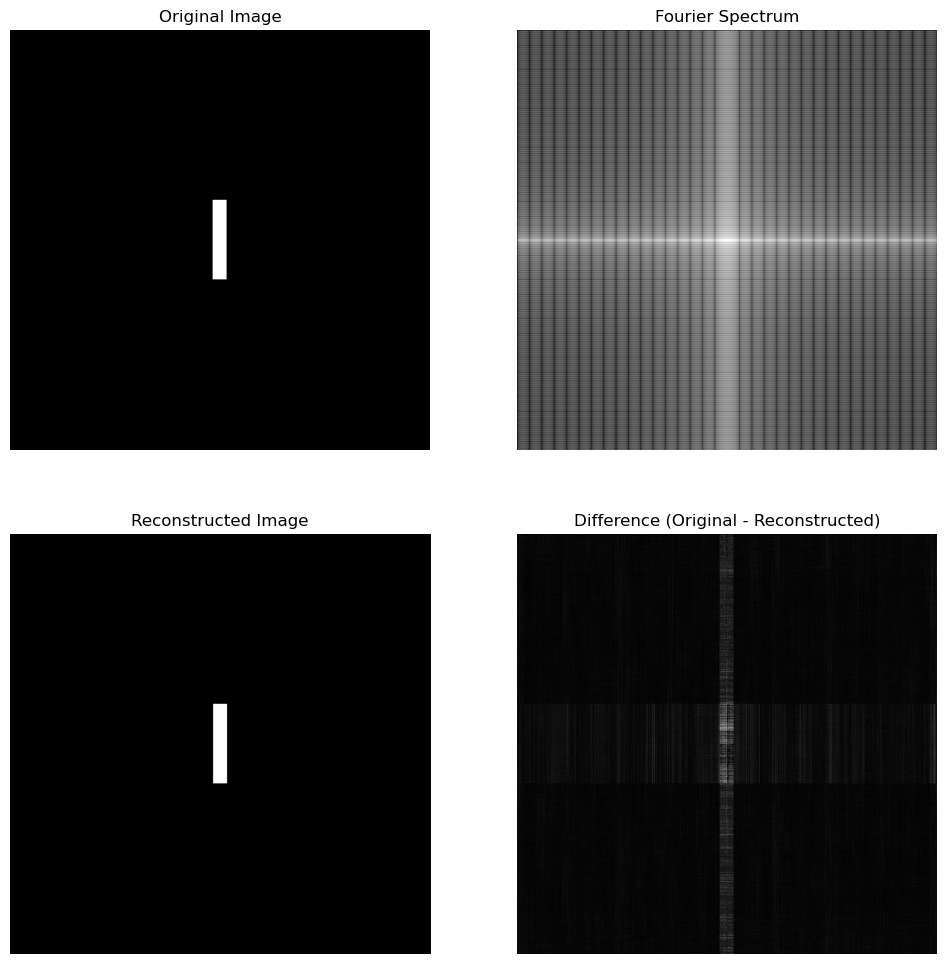

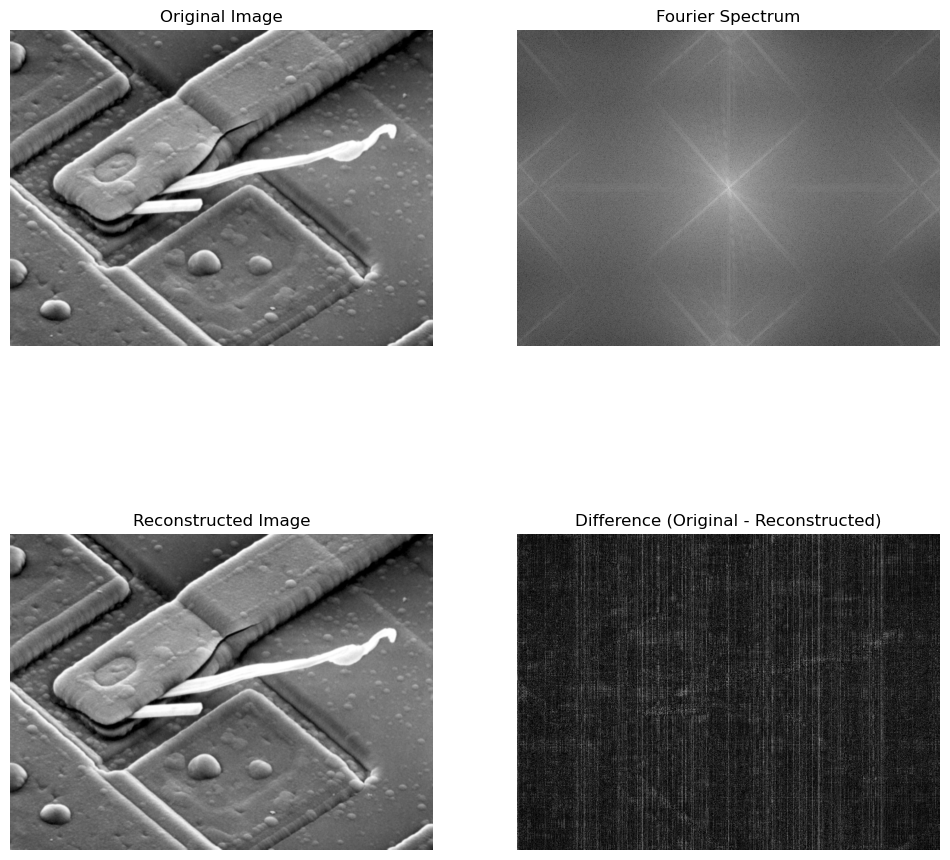

In [29]:
# 文件路徑
image_paths = [
    r"C:\Users\user\ncku\Assignment 3 Fourier Transform\Fig0424(a)(rectangle).bmp",
    r"C:\Users\user\ncku\Assignment 3 Fourier Transform\Fig0429(a)(blown_ic).bmp"
]

# 對每張圖片做傅立葉轉換+展示結果
for path in image_paths:
    original_img, f_transform_shifted, magnitude_spectrum = compute_fourier_transform(path)
    reconstructed_img = compute_inverse_fourier_transform(f_transform_shifted)
    plot_images(original_img, magnitude_spectrum, reconstructed_img, "Original Image", "Fourier Spectrum", "Reconstructed Image")

In [16]:

def ideal_lowpass_filter(shape, cutoff):
    # 產生低通濾波器
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = (x - crow)**2 + (y - ccol)**2 <= cutoff**2
    filter_kernel = np.zeros((rows, cols), dtype=np.float32)
    filter_kernel[mask] = 1
    return filter_kernel

In [17]:
def ideal_highpass_filter(shape, cutoff):
    # 產生高通濾波器
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    x, y = np.ogrid[:rows, :cols]
    mask = (x - crow)**2 + (y - ccol)**2 > cutoff**2
    filter_kernel = np.zeros((rows, cols), dtype=np.float32)
    filter_kernel[mask] = 1
    return filter_kernel

In [21]:
def apply_filter(image_path, filter_type, cutoff):
    # 讀取圖片並轉換成灰度圖片
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"Image at path '{image_path}' could not be loaded.")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_float = np.float32(img)

    # 對圖片做傅立葉轉換
    f_transform = np.fft.fft2(img_float)
    f_transform_shifted = np.fft.fftshift(f_transform)

    # 產生濾波器
    if filter_type == 'lowpass':
        filter_kernel = ideal_lowpass_filter(img.shape, cutoff)
    else:
        filter_kernel = ideal_highpass_filter(img.shape, cutoff)

    # 濾波器使用
    filtered_transform = f_transform_shifted * filter_kernel
    filtered_image = np.fft.ifftshift(filtered_transform)
    filtered_image = np.fft.ifft2(filtered_image)
    filtered_image = np.abs(filtered_image)

    return filtered_image


In [22]:
def plot_all_filters(original, lowpass_5, lowpass_30, highpass_5, highpass_30):
    plt.figure(figsize=(20, 12))

    # 原始圖片
    plt.subplot(2, 3, 1)
    plt.imshow(original, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Lowpass Filter with cutoff=5
    plt.subplot(2, 3, 2)
    plt.imshow(lowpass_5, cmap='gray')
    plt.title("Lowpass Filtered (Cutoff: 5)")
    plt.axis('off')

    # Lowpass Filter with cutoff=30
    plt.subplot(2, 3, 3)
    plt.imshow(lowpass_30, cmap='gray')
    plt.title("Lowpass Filtered (Cutoff: 30)")
    plt.axis('off')

    # Highpass Filter with cutoff=5
    plt.subplot(2, 3, 5)
    plt.imshow(highpass_5, cmap='gray')
    plt.title("Highpass Filtered (Cutoff: 5)")
    plt.axis('off')

    # Highpass Filter with cutoff=30
    plt.subplot(2, 3, 6)
    plt.imshow(highpass_30, cmap='gray')
    plt.title("Highpass Filtered (Cutoff: 30)")
    plt.axis('off')

    plt.show()

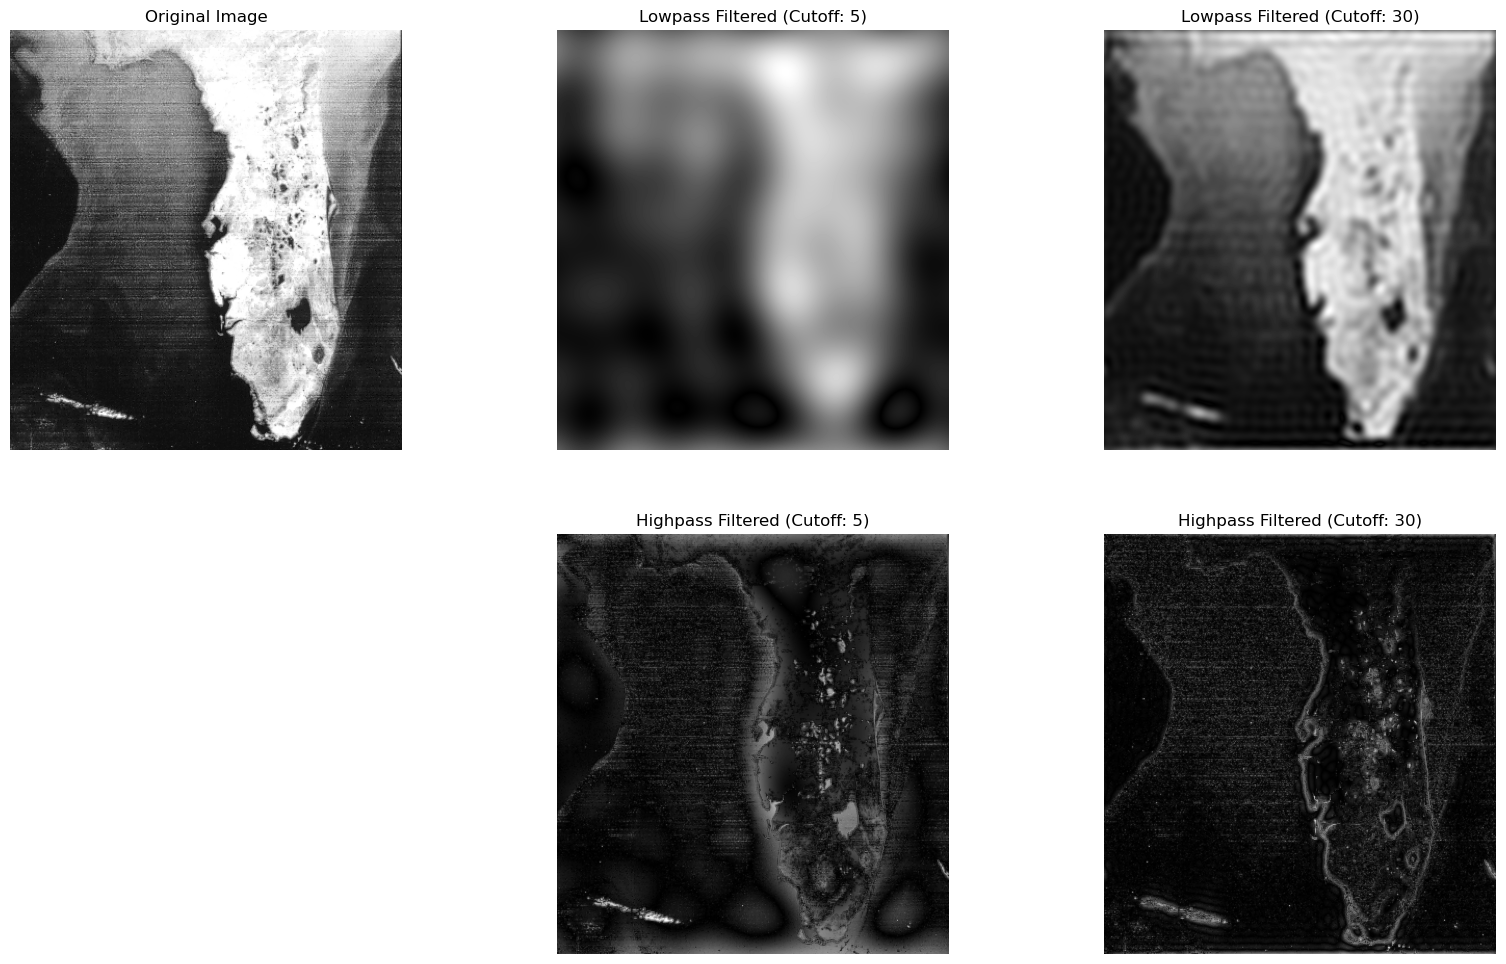

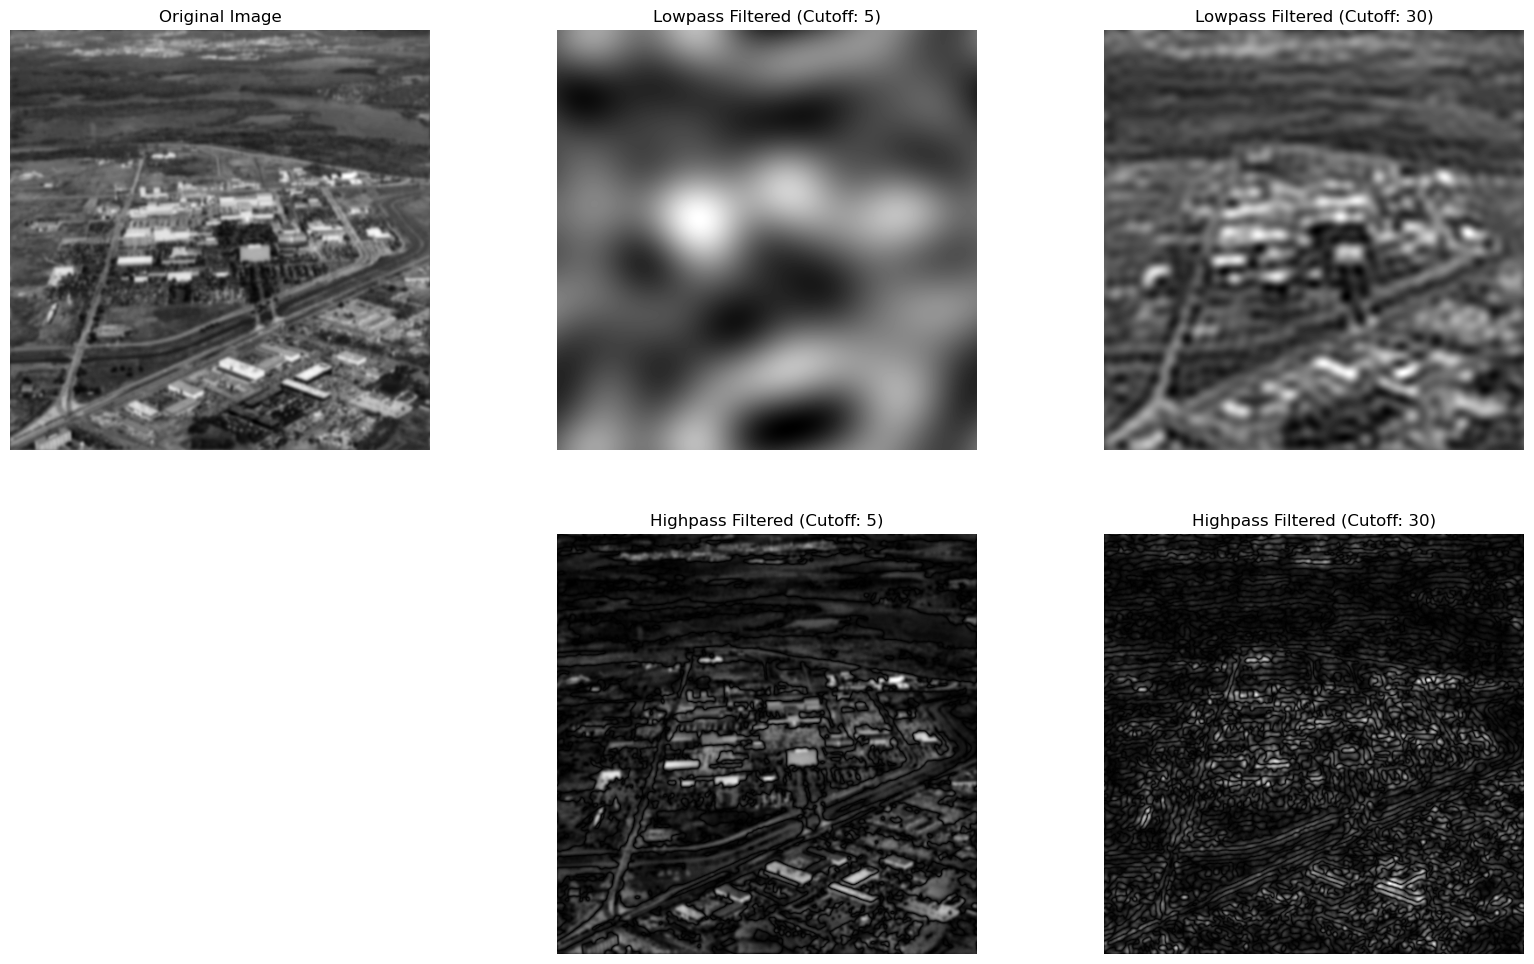

In [23]:
# 圖片位置
image_paths = [
    r"C:\Users\user\ncku\Assignment 3 Fourier Transform\Fig0519(a)(florida_satellite_original).bmp",
    r"C:\Users\user\ncku\Assignment 3 Fourier Transform\Fig0525(c)(aerial_view_turb_c_0pt001).bmp"
]

# 濾波器使用，結果展示
for path in image_paths:
    original_img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    lowpass_5 = apply_filter(path, 'lowpass', 5)
    lowpass_30 = apply_filter(path, 'lowpass', 30)
    highpass_5 = apply_filter(path, 'highpass', 5)
    highpass_30 = apply_filter(path, 'highpass', 30)
    
    plot_all_filters(original_img, lowpass_5, lowpass_30, highpass_5, highpass_30)